In [38]:
import numpy as np
from scipy.signal import butter, sosfiltfilt, sosfilt
import matplotlib.pyplot as plt
# Filter requirements.

fs = 30.0       # sample rate, Hz
cutoff = 0.01      # desired cutoff frequency of the filter, Hz
order = 2       # sin wave can be approx represented as quadratic

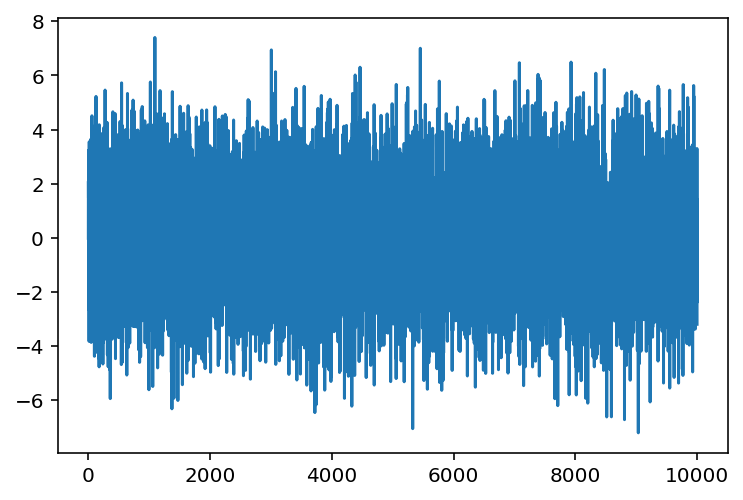

In [39]:
rng = np.random.default_rng(seed=12)

mean = 0
std = 2
num_samples = 10000
samples = rng.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

In [40]:
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    filt = butter(order, normal_cutoff, btype='low', analog=False, output='sos')
    y = sosfilt(filt, data)
    return y

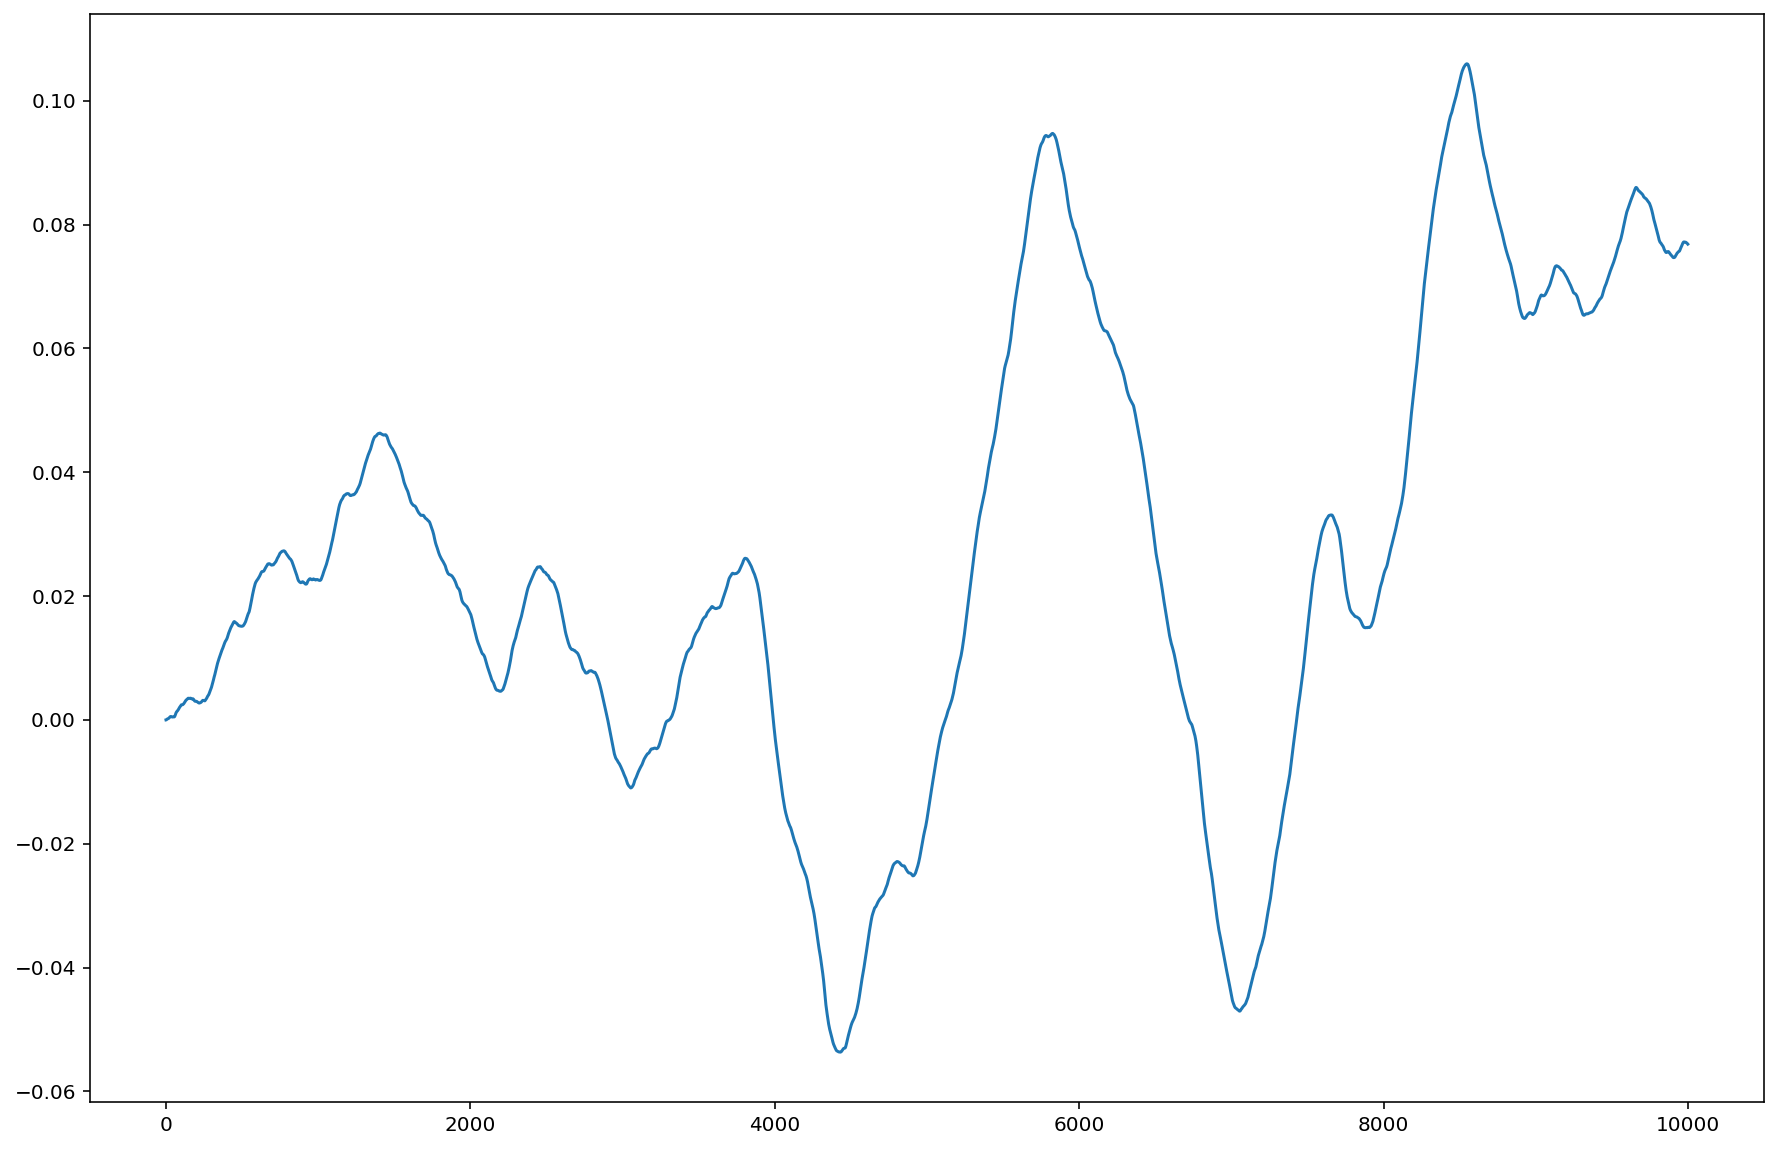

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(butter_lowpass_filter(samples, fs=fs, order=order, cutoff=cutoff));

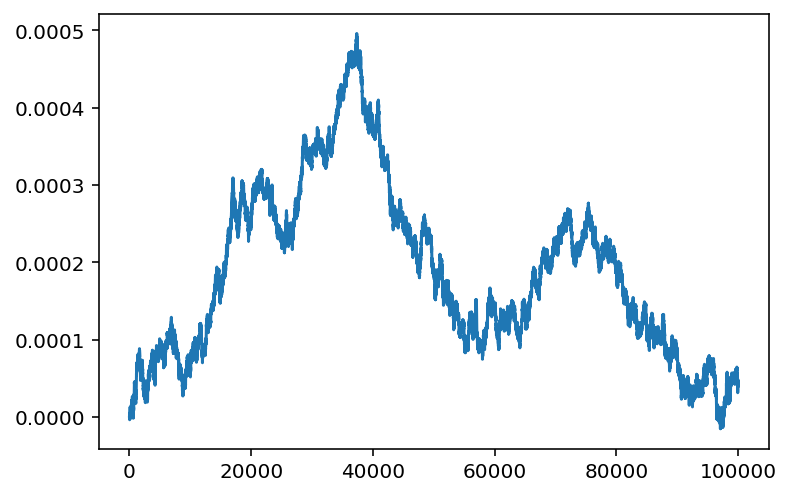

In [51]:
x = 0.0
alpha = 0.000001

x_s = []
for i in range(100000):
    x = (1-alpha)*x + alpha * np.random.normal()
    x_s.append(x)
    
plt.plot(x_s)

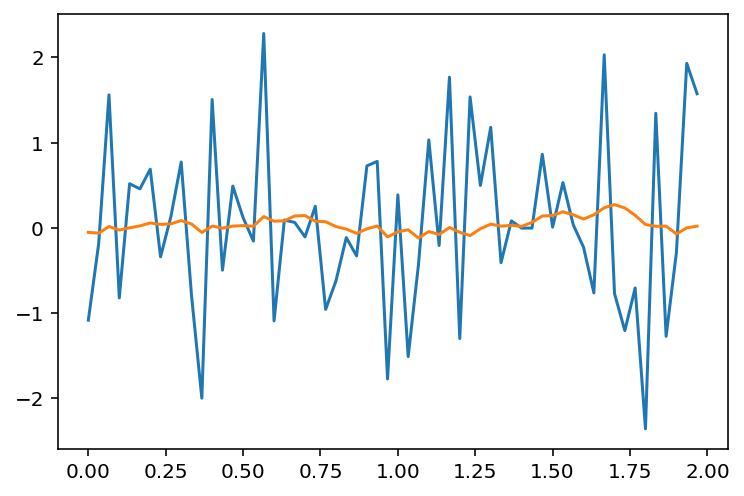

In [85]:
fps = 30
total_time = 2.0 
n_sample = int(total_time*fps)
T = 20
smp = []
buffer = np.zeros(T)
y = []
for i in range(n_sample):
    smp_i = np.random.normal()
    buffer = np.roll(buffer, -1)
    buffer[-1] = smp_i
    smp.append(smp_i)
    avg = np.mean(buffer)
    y.append(avg)
    
    
x = np.arange(n_sample) / fps
plt.plot(x, smp)
plt.plot(x, y)

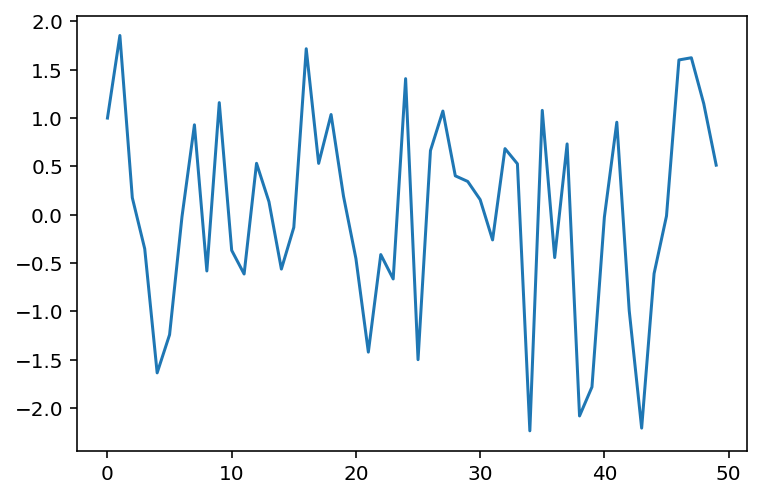

In [79]:
plt.plot(smp[-50:])

In [116]:
class SinusoidalNoise:

    def __init__(
            self, fps, rng,
            a=1.00,
            num_f=10,
            f_min=0.1,
            f_max=0.2):

        self.fps = fps
        self.t = 0
        self.a = a
        
        self.f_0 = rng.uniform(size=num_f) * (f_max - f_min) + f_min
        self.f_1 = rng.uniform(size=num_f) * (f_max - f_min) + f_min
        self.p_0 = rng.uniform(size=num_f) * 2 * np.pi
        self.p_1 = rng.uniform(size=num_f) * 2 * np.pi

    def new(self):

        x = self.oscillate(self.t, f_0, p_0)
        y = self.oscillate(self.t, f_1, p_1)

        self.t += 1 / self.fps
        pos = np.asarray([x, y]) * self.a
        return pos

    @staticmethod
    def oscillate(t, freq, phase):
        return np.sin(2*np.pi*freq*t + phase).sum()

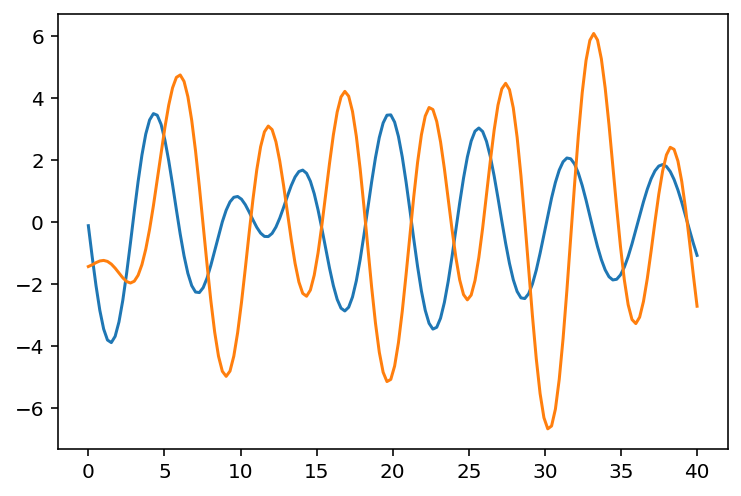

In [118]:
time = 40.0
fps = 4 
noise_maker = SinusoidalNoise(fps=fps, rng=np.random.default_rng(123))

x = np.linspace(0, time, int(fps*time)) 
y = np.asarray([noise_maker.new() for _ in x])

plt.plot(x, y)

In [103]:
x = np.linspace(0, time, num=int(fps*time)) 
x

array([ 0.        ,  0.25157233,  0.50314465,  0.75471698,  1.00628931,
        1.25786164,  1.50943396,  1.76100629,  2.01257862,  2.26415094,
        2.51572327,  2.7672956 ,  3.01886792,  3.27044025,  3.52201258,
        3.77358491,  4.02515723,  4.27672956,  4.52830189,  4.77987421,
        5.03144654,  5.28301887,  5.53459119,  5.78616352,  6.03773585,
        6.28930818,  6.5408805 ,  6.79245283,  7.04402516,  7.29559748,
        7.54716981,  7.79874214,  8.05031447,  8.30188679,  8.55345912,
        8.80503145,  9.05660377,  9.3081761 ,  9.55974843,  9.81132075,
       10.06289308, 10.31446541, 10.56603774, 10.81761006, 11.06918239,
       11.32075472, 11.57232704, 11.82389937, 12.0754717 , 12.32704403,
       12.57861635, 12.83018868, 13.08176101, 13.33333333, 13.58490566,
       13.83647799, 14.08805031, 14.33962264, 14.59119497, 14.8427673 ,
       15.09433962, 15.34591195, 15.59748428, 15.8490566 , 16.10062893,
       16.35220126, 16.60377358, 16.85534591, 17.10691824, 17.35

In [102]:
x = np.linspace(0, time, int(fps*time)) 
x

array([ 0.        ,  0.25157233,  0.50314465,  0.75471698,  1.00628931,
        1.25786164,  1.50943396,  1.76100629,  2.01257862,  2.26415094,
        2.51572327,  2.7672956 ,  3.01886792,  3.27044025,  3.52201258,
        3.77358491,  4.02515723,  4.27672956,  4.52830189,  4.77987421,
        5.03144654,  5.28301887,  5.53459119,  5.78616352,  6.03773585,
        6.28930818,  6.5408805 ,  6.79245283,  7.04402516,  7.29559748,
        7.54716981,  7.79874214,  8.05031447,  8.30188679,  8.55345912,
        8.80503145,  9.05660377,  9.3081761 ,  9.55974843,  9.81132075,
       10.06289308, 10.31446541, 10.56603774, 10.81761006, 11.06918239,
       11.32075472, 11.57232704, 11.82389937, 12.0754717 , 12.32704403,
       12.57861635, 12.83018868, 13.08176101, 13.33333333, 13.58490566,
       13.83647799, 14.08805031, 14.33962264, 14.59119497, 14.8427673 ,
       15.09433962, 15.34591195, 15.59748428, 15.8490566 , 16.10062893,
       16.35220126, 16.60377358, 16.85534591, 17.10691824, 17.35

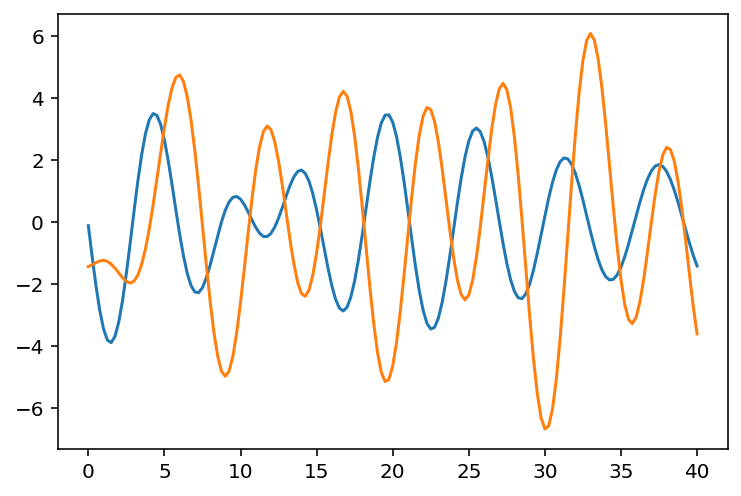

In [111]:
rng = np.random.default_rng()

fs = 4

num_f = 10

f_min, f_max = 0.1, 0.2

f_0 = rng.uniform(size=num_f) * (f_max - f_min) + f_min

f_1 = rng.uniform(size=num_f) * (f_max - f_min) + f_min

p_0 = rng.uniform(size=num_f)*2*np.pi

p_1 = rng.uniform(size=num_f)*2*np.pi



def oscillate(t, freq, phase):
    return np.sin(2*np.pi*freq*t + phase).sum()



T = int(4/f_min)

t = np.linspace(0, T, num=fs*T+1)

x_0 = [oscillate(t_, f_0, p_0) for t_ in t]

x_1 = [oscillate(t_, f_1, p_1) for t_ in t]

plt.plot(t, x_0)
plt.plot(t, x_1)

In [119]:
from scipy.special import softmax

In [124]:
softmax([0, 8])

array([3.3535013e-04, 9.9966465e-01])